Class Distribution in Original Data:
1    357
0    212
Name: count, dtype: int64

Class Distribution in Training Set (After Normalization):
1    286
0    169
Name: count, dtype: int64

Class Distribution in Testing Set (After Normalization):
1    71
0    43
Name: count, dtype: int64


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

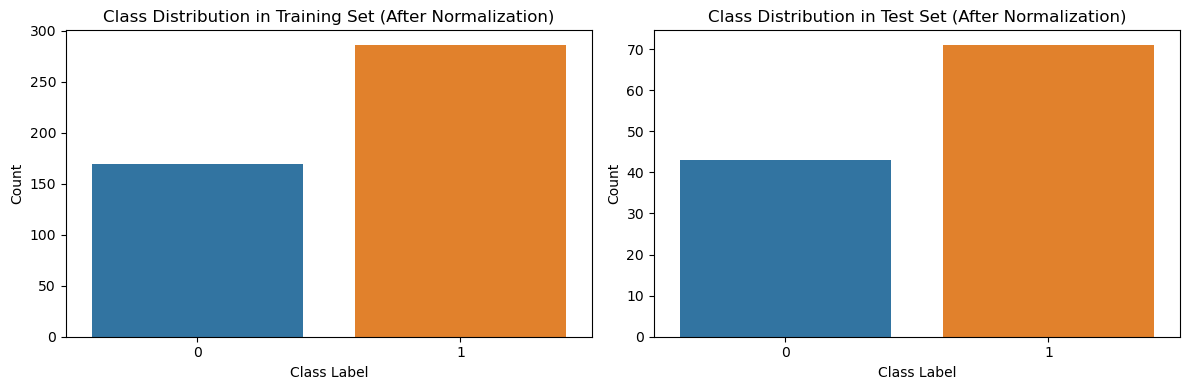

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, confusion_matrix, accuracy_score, adjusted_mutual_info_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Print class distribution before normalization
print("Class Distribution in Original Data:")
print(pd.Series(y).value_counts())

# Handling missing NaN values (replacing with mean)
X = np.nan_to_num(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing the data between 0 and 1
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Print class distribution after normalization
print("\nClass Distribution in Training Set (After Normalization):")
print(pd.Series(y_train).value_counts())

print("\nClass Distribution in Testing Set (After Normalization):")
print(pd.Series(y_test).value_counts())

# 4. Visualize class distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set (After Normalization)")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set (After Normalization)")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [2]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,...,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,...,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,...,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,...,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,...,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732


In [5]:
#EM

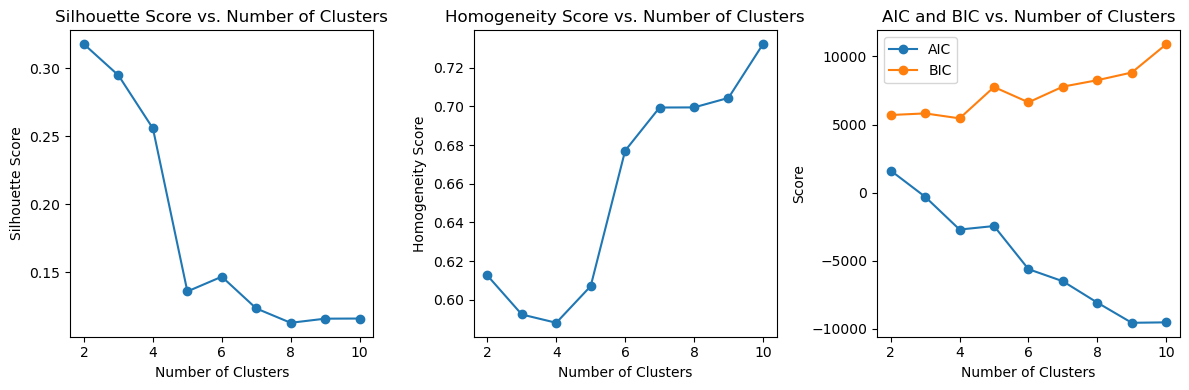

Number of Clusters: 2, Accuracy: 0.0000
Number of Clusters: 3, Accuracy: 0.0000
Number of Clusters: 4, Accuracy: 0.0000
Number of Clusters: 5, Accuracy: 0.0000
Number of Clusters: 6, Accuracy: 0.0000
Number of Clusters: 7, Accuracy: 0.6286
Number of Clusters: 8, Accuracy: 0.0000
Number of Clusters: 9, Accuracy: 0.0000
Number of Clusters: 10, Accuracy: 0.0000


In [15]:
# Define a range of cluster numbers to explore (you can adjust this)
min_clusters = 2
max_clusters = 10

# Initialize lists to store evaluation metrics
silhouette_scores = []
homogeneity_scores = []
aic_scores = []
bic_scores = []

# Iterate through different numbers of clusters
for n_clusters in range(min_clusters, max_clusters + 1):
    # Create a Gaussian Mixture Model with n_clusters
    gmm = GaussianMixture(n_components=n_clusters, max_iter=100, random_state=42, n_init=5)
    
    # Fit the model to the training data
    gmm.fit(X_train)
    
    # Predict cluster labels for the training data
    cluster_labels = gmm.predict(X_train)
    
    # Calculate silhouette score and homogeneity score
    silhouette = silhouette_score(X_train, cluster_labels, metric='euclidean')
    homogeneity = homogeneity_score(y_train, cluster_labels)
    
    # Compute AIC and BIC scores
    aic = gmm.aic(X_train)
    bic = gmm.bic(X_train)
    
    # Append scores to the respective lists
    silhouette_scores.append(silhouette)
    homogeneity_scores.append(homogeneity)
    aic_scores.append(aic)
    bic_scores.append(bic)

# Plot silhouette scores
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

# Plot homogeneity scores
plt.subplot(1, 3, 2)
plt.plot(range(min_clusters, max_clusters + 1), homogeneity_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')
plt.title('Homogeneity Score vs. Number of Clusters')

# Plot AIC and BIC scores
plt.subplot(1, 3, 3)
plt.plot(range(min_clusters, max_clusters + 1), aic_scores, marker='o', label='AIC')
plt.plot(range(min_clusters, max_clusters + 1), bic_scores, marker='o', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC vs. Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

# Optionally, you can calculate and print accuracy scores for each clustering result
# Assuming you have true labels (y_train) for the training data
for n_clusters, cluster_labels in zip(range(min_clusters, max_clusters + 1), cluster_labels):
    accuracy = np.mean(cluster_labels == y_train)
    print(f"Number of Clusters: {n_clusters}, Accuracy: {accuracy:.4f}")


For n_clusters=2, The Silhouette Coefficient is 0.3176833629652997
For n_clusters=2, The homogeneity_score is 0.6125251135822773
For n_clusters=2, The average log_likelihood score is 0.4009218726851869
For n_clusters=3, The Silhouette Coefficient is 0.2947622483752179
For n_clusters=3, The homogeneity_score is 0.592353396067574
For n_clusters=3, The average log_likelihood score is 3.6065931841926284
For n_clusters=4, The Silhouette Coefficient is 0.25570621728683335
For n_clusters=4, The homogeneity_score is 0.5880550741117369
For n_clusters=4, The average log_likelihood score is 7.342756483336494
For n_clusters=5, The Silhouette Coefficient is 0.13573172548325316
For n_clusters=5, The homogeneity_score is 0.6070219647308849
For n_clusters=5, The average log_likelihood score is 8.148092336928176
For n_clusters=6, The Silhouette Coefficient is 0.14657559891782806
For n_clusters=6, The homogeneity_score is 0.6770934437206937
For n_clusters=6, The average log_likelihood score is 12.719502

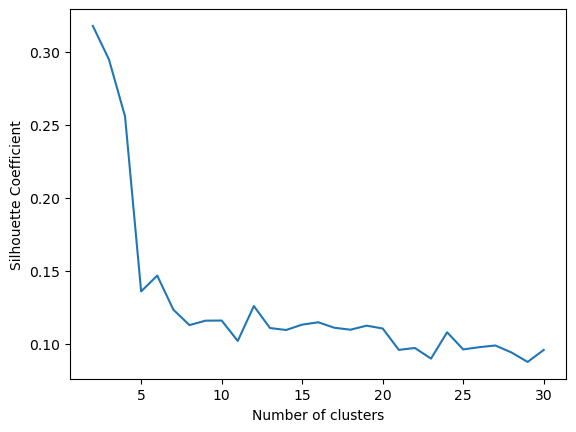

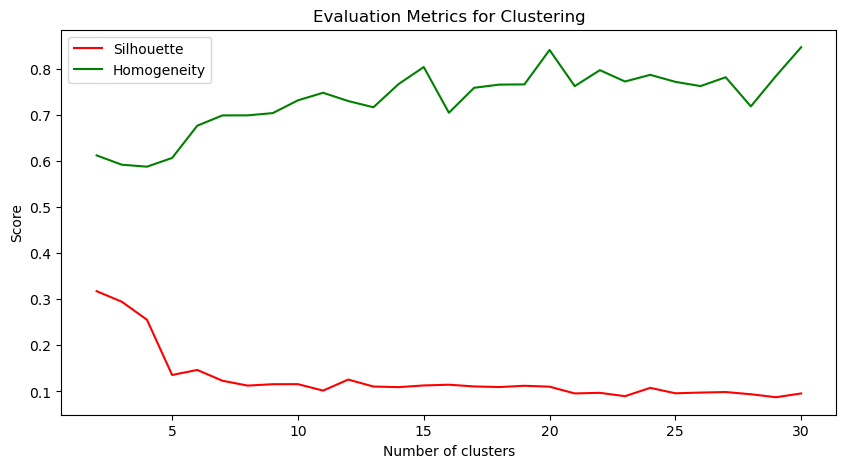

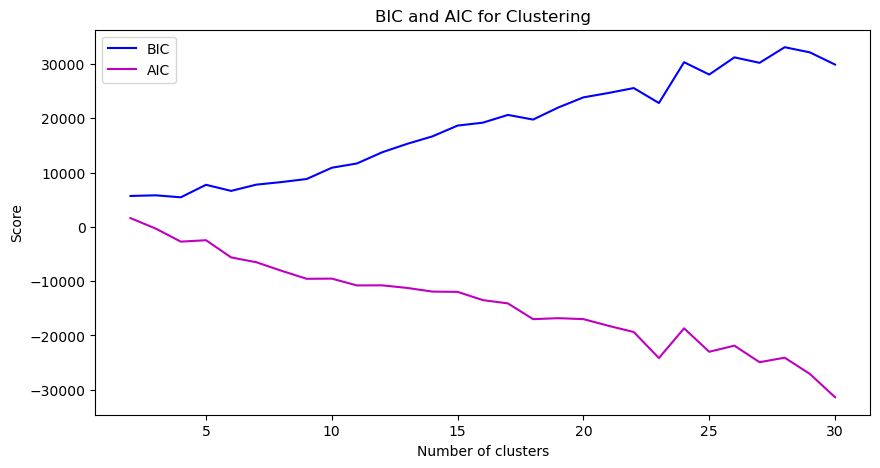

In [3]:
# Use X_train for clustering
clusters = list(range(2, 31, 1))
silh_WDBC_EM = {}
homog_WDBC_EM = {}

for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=42, n_init=5).fit(X_train)
    label = gmm.predict(X_train)
    
    sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    homog_score = homogeneity_score(y_train, label)
    log_likelihood = gmm.score(X_train)  # Compute average log likelihood
    
    silh_WDBC_EM[cluster] = sil_coeff
    homog_WDBC_EM[cluster] = homog_score
    
    print(f"For n_clusters={cluster}, The Silhouette Coefficient is {sil_coeff}")
    print(f"For n_clusters={cluster}, The homogeneity_score is {homog_score}")
    print(f"For n_clusters={cluster}, The average log_likelihood score is {log_likelihood}")

# Plot Silhouette Coefficients
plt.figure()
plt.plot(list(silh_WDBC_EM.keys()), list(silh_WDBC_EM.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Plot Silhouette Coefficient & Homogeneity Score
plt.figure(figsize=(10, 5))
plt.plot(list(silh_WDBC_EM.keys()), list(silh_WDBC_EM.values()), 'r', label="Silhouette")
plt.plot(list(homog_WDBC_EM.keys()), list(homog_WDBC_EM.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.title("Evaluation Metrics for Clustering")

# Calculate BIC and AIC for each number of clusters
bic_scores = []
aic_scores = []

for cluster in clusters:
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=42, n_init=5).fit(X_train)
    bic_scores.append(gmm.bic(X_train))
    aic_scores.append(gmm.aic(X_train))

# Plot BIC and AIC
plt.figure(figsize=(10, 5))
plt.plot(clusters, bic_scores, 'b', label="BIC")
plt.plot(clusters, aic_scores, 'm', label="AIC")
plt.legend()
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.title("BIC and AIC for Clustering")

plt.show()

# You can then proceed with Gaussian Mixture models of various components and evaluate them as needed.

In [24]:
# Fit a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, max_iter=100, random_state=42, n_init=5).fit(X_train)

# Predict cluster labels
labels = gmm.predict(X_train)

# One way to align the cluster labels with the true labels is by checking the means of the two clusters.
# If the mean of the first cluster (label 0) is greater than that of the second cluster (label 1), we can assume 
# that the first cluster corresponds to the malignant class and the second one to benign (or vice versa).
if gmm.means_[0, 0] > gmm.means_[1, 0]:
    labels = 1 - labels  # swapping 0s and 1s

# Calculate accuracy by comparing predicted labels to true labels
accuracy = accuracy_score(labels, y_train)
print("Accuracy of clustering with 2 clusters:", accuracy)
print("\nMeans of the GMM components for 2 clusters:")
print(gmm.means_)

# Fit a Gaussian Mixture Model with 7 components
gmm = GaussianMixture(n_components=7, max_iter=100, random_state=42, n_init=5).fit(X_train)

# Predict cluster labels
labels = gmm.predict(X_train)

# Calculate accuracy by comparing predicted labels to true labels (no label modification for more than 2 clusters)
accuracy = accuracy_score(labels, y_train)
print("Accuracy of clustering with 7 clusters:", accuracy)
print("\nMeans of the GMM components for 7 clusters:")
print(gmm.means_)

# Fit a Gaussian Mixture Model with 29 components
gmm = GaussianMixture(n_components=29, max_iter=100, random_state=42, n_init=5).fit(X_train)

# Predict cluster labels
labels = gmm.predict(X_train)

# Calculate accuracy by comparing predicted labels to true labels (no label modification for more than 2 clusters)
accuracy = accuracy_score(labels, y_train)
print("Accuracy of clustering with 29 clusters:", accuracy)

Accuracy of clustering with 2 clusters: 0.07252747252747253

Means of the GMM components for 2 clusters:
[[-0.5191584  -0.25757586 -0.53597552 -0.50910979 -0.31092387 -0.53649726
  -0.60007778 -0.61084372 -0.31162457 -0.1325579  -0.41741303 -0.01157092
  -0.4231689  -0.3918441   0.00197947 -0.34810504 -0.32566239 -0.38638093
  -0.07692096 -0.22353584 -0.55799548 -0.28558619 -0.57387334 -0.53225338
  -0.3290332  -0.51563319 -0.5704214  -0.61699515 -0.35260932 -0.35800909]
 [ 0.86366069  0.42849764  0.89163729  0.84694404  0.51724623  0.89250524
   0.99827642  1.0161864   0.5184119   0.22052045  0.69439929  0.01924914
   0.70397462  0.65186337 -0.003293    0.57910001  0.5417649   0.64277496
   0.12796404  0.37186939  0.92826921  0.475095    0.95468328  0.88544522
   0.54737251  0.85779622  0.9489407   1.02641979  0.58659323  0.59557618]]
Accuracy of clustering with 7 clusters: 0.22417582417582418

Means of the GMM components for 7 clusters:
[[-1.08721179e+00 -1.15955753e-01 -1.03841572e+

In [25]:
#K-Means

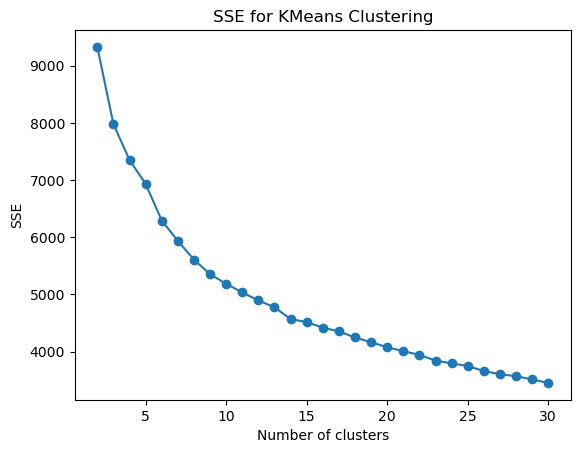

In [3]:
# Clustering using KMeans and calculating SSE for different number of clusters
clusters = list(range(2, 31, 1))
sse = {}

for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=100, random_state=42, n_init=5).fit(X_train)
    label = kmeans.labels_
    sse[cluster] = kmeans.inertia_  # Inertia is the Sum of Squared Errors for KMeans

# Plotting SSE for each number of clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("SSE for KMeans Clustering")
plt.show()

In [4]:
# Using 2 clusters as an example to measure "accuracy"
kmeans = KMeans(n_clusters=2, max_iter=100, random_state=42, n_init=5).fit(X_train)
labels = kmeans.labels_

# Align the cluster labels with true labels
# Check the mode of the two clusters. If the mode of the first cluster is 0, then this cluster might correspond to benign tumors, and vice versa.
from scipy.stats import mode
labels = np.zeros_like(kmeans.labels_)
for i in range(2):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(y_train[mask])[0]

# Calculate accuracy by comparing KMeans labels to true labels
accuracy = accuracy_score(labels, y_train)
print(f"Accuracy of KMeans clustering with 2 clusters on training data: {accuracy:.2f}")

# NOTE: Accuracy isn't always a meaningful metric for clustering. The goal of clustering is to find inherent structure in the data, not necessarily to "classify" data points.

Accuracy of KMeans clustering with 2 clusters on training data: 0.90


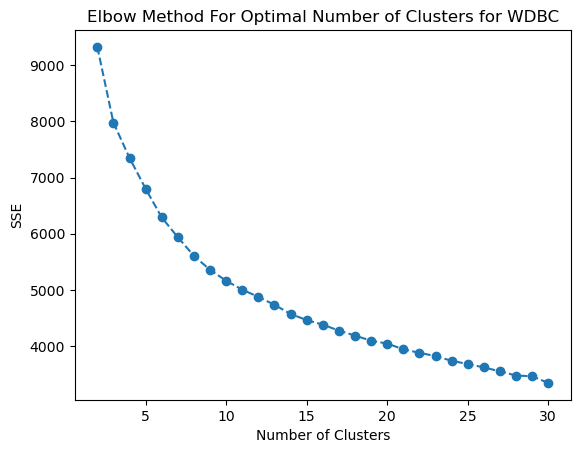

Accuracy for 2 clusters: 0.5912087912087912
Adjusted Mutual Information Score for 2 clusters: 0.5159003858161685
Accuracy for 7 clusters: 0.015384615384615385
Adjusted Mutual Information Score for 7 clusters: 0.4006781567057782
For n_clusters=2, The Silhouette Coefficient is 0.3431186932211998
For n_clusters=2, The homogeneity_score is 0.5112429771855603
For n_clusters=3, The Silhouette Coefficient is 0.3221206948907419
For n_clusters=3, The homogeneity_score is 0.5369286421909207
For n_clusters=4, The Silhouette Coefficient is 0.2947681121295915
For n_clusters=4, The homogeneity_score is 0.5786909240532736
For n_clusters=5, The Silhouette Coefficient is 0.28964050046983647
For n_clusters=5, The homogeneity_score is 0.6402727891756076
For n_clusters=6, The Silhouette Coefficient is 0.16611525904565422
For n_clusters=6, The homogeneity_score is 0.6512163835723743
For n_clusters=7, The Silhouette Coefficient is 0.17549095614310695
For n_clusters=7, The homogeneity_score is 0.682372237980

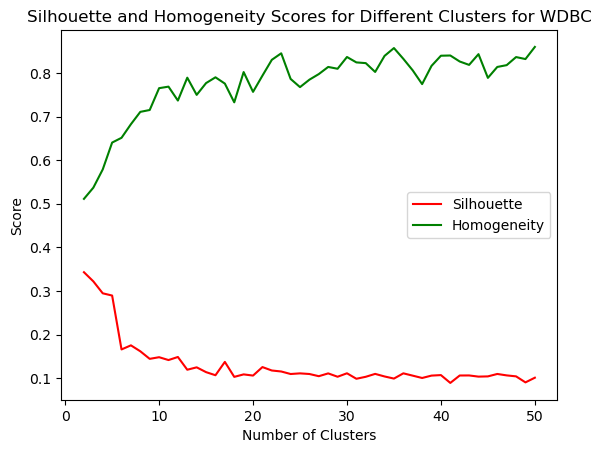

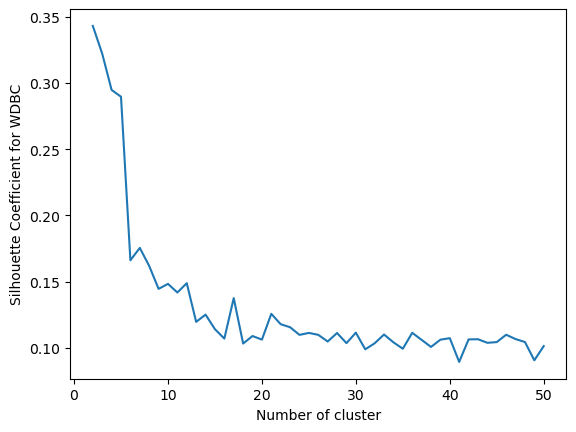

In [2]:
# SSE Calculation for the WDBC dataset
clusters = list(range(2,31,1))
sse_wdbc = {}

for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=42).fit(X_train) # replace wineX with wdbcX
    sse_wdbc[cluster] = kmeans.inertia_

# Plotting the SSE
plt.figure()
plt.plot(list(sse_wdbc.keys()), list(sse_wdbc.values()), marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters for WDBC')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Accuracy and Adjusted Mutual Information Score Calculation for 3 and 5 clusters
kmeans_2clusters = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=42).fit(X_train)
print("Accuracy for 2 clusters:", accuracy_score((kmeans_2clusters.labels_+1), y_train))
print("Adjusted Mutual Information Score for 2 clusters:", adjusted_mutual_info_score((kmeans_2clusters.labels_+1), y_train))

kmeans_7clusters = KMeans(n_clusters=7, n_init=50, max_iter=1000, random_state=42).fit(X_train)
print("Accuracy for 7 clusters:", accuracy_score((kmeans_7clusters.labels_+1), y_train))
print("Adjusted Mutual Information Score for 7 clusters:", adjusted_mutual_info_score((kmeans_7clusters.labels_+1), y_train))

# Silhouette and Homogeneity Calculation
silh_wdbc = {}
homog_wdbc = {}
clusters = list(range(2,51,1))

for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=42).fit(X_train)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    homog_score = homogeneity_score(y_train, (label+1))
    
    silh_wdbc[cluster] = sil_coeff
    homog_wdbc[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))

# Plotting Silhouette and Homogeneity scores
plt.figure()
plt.plot(list(silh_wdbc.keys()), list(silh_wdbc.values()), 'r', label="Silhouette")
plt.plot(list(homog_wdbc.keys()), list(homog_wdbc.values()), 'g', label="Homogeneity")
plt.title('Silhouette and Homogeneity Scores for Different Clusters for WDBC')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.legend()
plt.show()

plt.figure()
plt.plot(list(silh_wdbc.keys()), list(silh_wdbc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient for WDBC")
plt.show()
